In [1]:
import os
import rootpath
import sys
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
from figure_utilities import *

In [4]:
format_figures()

(2000, 2)

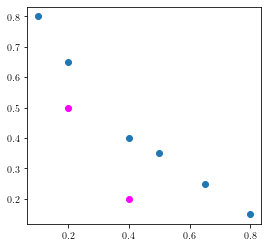

In [5]:
P = np.asarray([[1, 8], [2, 6.5], [4, 4], [5, 3.5], [6.5, 2.5], [8, 1.5]])/10
T = np.asarray([[2, 5], [4, 2]])/10

plt.scatter(P[:,0], P[:, 1])
plt.scatter(T[:,0], T[:, 1], c="magenta")
plt.axis('scaled')

M, N = 40, 50
x = np.linspace(0, 10, M)
y = np.linspace(0, 10, N)
xx, yy = np.meshgrid(x, y)
xy = np.vstack((xx.flat, yy.flat)).T
xy.shape

In [6]:
def sigmoid(x, beta=1):
    squashed = 1 / (1 + np.exp(-beta * x))
    return squashed

In [7]:
def saf(P, X):
    """Find the distance that identifies the summary attainment surface"""
    assert P.shape[1] == X.shape[1]
    D = np.zeros((X.shape[0], P.shape[0]))
    for i, p in enumerate(P):
        D[:,i] = np.max(p - X, axis=1)
    return np.min(D, axis=1)

In [8]:
def osaf(T, X):
    """Find the distance that identifies the optimistic summary attainment surface"""
    assert T.shape[1] == X.shape[1]
    D = np.zeros((X.shape[0], T.shape[0]))
    for i, p in enumerate(T):
        D[:,i] = np.min(p - X, axis=1)
    return np.max(D, axis=1)

In [9]:
def dsaf(P, X, T, w=0.5, beta=1):
    D_saf = saf(P, X)
    D_osaf = osaf(T, X)
    return w*sigmoid(D_saf, beta) + (1-w)*sigmoid(D_osaf, beta)

In [10]:
def image_infill(f, P, T=None, resolution=10, f_args={}):
    x =  np.linspace(0, 1, resolution)
    y =  np.linspace(0, 1, resolution)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.reshape(-1), yy.reshape(-1))).T
    z = f(P, xy, **f_args).reshape(resolution, resolution)
    
    fig = plt.figure(figsize=[4., 4.])
    ax = fig.gca()
    ax.imshow(z.reshape(resolution, resolution), vmin=0.3, vmax=0.6, origin="lower", extent=[0., 1., 0., 1.])
    ax.scatter(*P.T, c="C1")
    if T is not None:
        ax.scatter(*T.T, **Styles.points_target)
    ax.contour(x, y, z, colors="lightgrey", linestyles="-", levels=np.linspace(z.min(), z.max(), 15))
    
    fp = f(P, P, **f_args)
    print(fp)
    print(np.min(fp))
    ax.contour(x, y, z, colors="C3", linestyles="--", levels=[np.max(fp)])
    plt.xticks([])
    plt.yticks([])
    ax.set_xlabel(r"$f_1$")
    ax.set_ylabel(r"$f_2$")
    return fig, z

[0.42555748 0.46257015 0.450166   0.46257015 0.4378235  0.40131234]
0.401312339887548
0.31002551887238755 0.549833997312478 w_comp_stage_0p0
[0.44416811 0.47192762 0.4626245  0.47192762 0.45336762 0.42598425]
0.425984254915661
0.32110506259784183 0.5620474130124715 w_comp_stage_0p25
[0.46277874 0.48128508 0.475083   0.48128508 0.46891175 0.45065617]
0.450656169943774
0.33218460632329605 0.574260828712465 w_comp_stage_0p5
[0.48138937 0.49064254 0.4875415  0.49064254 0.48445587 0.47532808]
0.475328084971887
0.34326415004875027 0.5864742444124584 w_comp_stage_0p75
[0.5 0.5 0.5 0.5 0.5 0.5]
0.5
0.35434369377420455 0.598687660112452 w_comp_stage_1p0


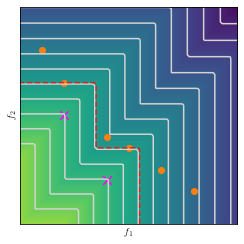

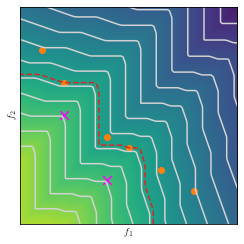

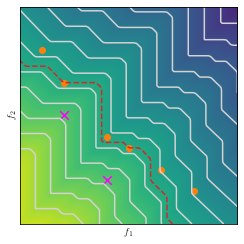

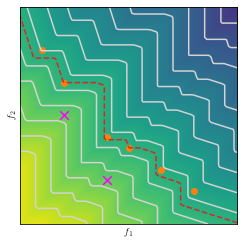

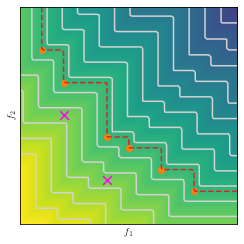

In [19]:
for w in [0. , 0.25, 0.5, 0.75, 1.]:
    fig_dsaf, z_dsaf = image_infill(dsaf, P, T, resolution=100, f_args={"w":w, "beta": 1., "T": T});
    print(z_dsaf.min(), z_dsaf.max(),"w_comp_stage_{}".format(str(w).replace(".", "p")))
#     save_fig(fig_dsaf, "w_comp_stage_{}".format(str(w).replace(".", "p")))

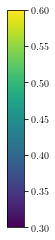

In [18]:
fig_cb, ax_cb = plt.subplots(figsize=(0.3, 4))
norm = mpl.colors.Normalize(vmin=0.3, vmax=0.6)
cb = mpl.colorbar.ColorbarBase(ax_cb, cmap="viridis", norm=norm, orientation='vertical')
# save_fig(fig_cb, "w_comp_stage_colorbar")